# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML


In [63]:
# code
import numpy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn import datasets
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from scipy.stats import mode

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [ ]:
#code
iris = datasets.load_iris()

In [ ]:
#code
X_train = iris.data
y_train = iris.target

In [ ]:
clf = svm.SVC(kernel='sigmoid', random_state=0)
scores = cross_validate(clf , X_train,y_train, scoring='accuracy', cv =10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.06666666666666668


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [ ]:
random =RandomForestClassifier(random_state=42)

In [ ]:
random.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
import time
start_time = time.time()
importances = random.feature_importances_
std = np.std([importances for feature , importances in zip(iris.feature_names, importances)], axis=0)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.015 seconds


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=42)

In [ ]:
y_pred = random.predict(X_test)

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model =RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X_train, y_train,scoring='accuracy', cv =cv)
print(scores.mean())

0.9444444444444444


In [ ]:
confusion = confusion_matrix(y_test, y_pred)

In [ ]:
print ("Confusion matrix :\n", confusion_matrix(y_test, y_pred))

Confusion matrix :
 [[23  0  0]
 [ 0 19  0]
 [ 0  1 17]]


In [ ]:
acc = round(accuracy_score(y_test, y_pred), 2)
pre = round(precision_score(y_test, y_pred, average='micro'), 2)
recall = round(recall_score(y_test, y_pred, average='micro'), 2)
f1 = round(f1_score(y_test, y_pred, average='micro'), 2)

In [ ]:
print ("Accuracy : ", accuracy_score(y_test, y_pred))
print ("Precision : ", precision_score(y_test, y_pred,average='micro'))
print ("Recall : ", recall_score(y_test, y_pred, average='micro'))
print ("F1 : ", f1_score(y_test, y_pred, average='micro'))

Accuracy :  0.9833333333333333
Precision :  0.9833333333333333
Recall :  0.9833333333333333
F1 :  0.9833333333333333


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [5]:
# code
mnist = datasets.load_digits()

In [6]:
X = mnist['data']
y = mnist['target']

In [7]:
k=10
kmeans = KMeans(n_clusters = k, random_state = 0,n_init= 'auto')
kmeans.fit(mnist.data)
clusters = kmeans.predict(mnist.data)
clusters

array([1, 2, 2, ..., 2, 3, 3], dtype=int32)

In [8]:
from sklearn.metrics import accuracy_score
print (accuracy_score(mnist.target, clusters))

0.2843628269337785


In [9]:
from sklearn.metrics.cluster import completeness_score
print (completeness_score(mnist.target, clusters))

0.7421559553417136


In [10]:
from scipy.stats import mode
from sklearn.metrics import accuracy_score

labels = np.zeros_like(clusters)
print(labels)
for i in range(9):
  print(i, '------------------------------')
  mask = (clusters == i)
  print(mask)
  labels[mask] = mode(mnist.target[mask])[0]
  print(labels) 
accuracy_score(mnist.target, labels)

[0 0 0 ... 0 0 0]
0 ------------------------------
[False False False ... False False False]
[0 0 0 ... 0 0 0]
1 ------------------------------
[ True False False ... False False False]
[0 0 0 ... 0 0 0]
2 ------------------------------
[False  True  True ...  True False False]
[0 1 1 ... 1 0 0]
3 ------------------------------
[False False False ... False  True  True]
[0 1 1 ... 1 9 9]
4 ------------------------------
[False False False ... False False False]
[0 1 1 ... 1 9 9]
5 ------------------------------
[False False False ... False False False]
[0 1 1 ... 1 9 9]
6 ------------------------------
[False False False ... False False False]
[0 1 1 ... 1 9 9]
7 ------------------------------
[False False False ... False False False]
[0 1 1 ... 1 9 9]
8 ------------------------------
[False False False ... False False False]
[0 1 1 ... 1 9 9]


<ipython-input-10-113787d5eaf9>:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(mnist.target[mask])[0]


0.7028380634390651

In [11]:
print(labels)

[0 1 1 ... 1 9 9]


In [12]:
precision_score(mnist.target, labels, average='macro')

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.6067111415511507

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [22]:
# code
X, X_test, y, y_test = train_test_split(mnist.data, mnist.target, test_size=0.3, random_state=42)

In [23]:
rf = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()

In [29]:
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

In [30]:
rf_scores = cross_validate(rf, X, y, cv=5, scoring=scoring)
knn_scores = cross_validate(knn, X, y, cv=5, scoring=scoring)
nb_scores = cross_validate(nb, X, y, cv=5, scoring=scoring)

In [33]:
print("Random Forest scores:\n", np.mean(list(rf_scores.values()), axis=1))
print("KNN scores:\n", np.mean(list(knn_scores.values()), axis=1))
print("Naive Bayes scores:\n", np.mean(list(nb_scores.values()), axis=1))

Random Forest scores:
 [0.6575079  0.03965125 0.96740973 0.96903094 0.96754857 0.96719391]
KNN scores:
 [0.00166974 0.05377245 0.978524   0.97939891 0.97854833 0.9785429 ]
Naive Bayes scores:
 [0.00539632 0.01314487 0.82981092 0.8683145  0.83141442 0.83484996]


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

Phương pháp học có giám sát(Supervised learning) là một phương pháp phù hợp hơn.

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [38]:
from sklearn.cluster import AgglomerativeClustering
n_clusters=10
agglomerative = AgglomerativeClustering(n_clusters=10)
agglomerative.fit(mnist.data)

AgglomerativeClustering(n_clusters=10)

In [39]:
labels = agglomerative.labels_

In [40]:
print("Cluster labels:\n", labels[:10])

Cluster labels:
 [7 9 4 1 5 1 6 3 4 1]


#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [55]:
#code
data = pd.read_csv('Lab/Lab7/shopping-data.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [56]:
data = data.drop(['CustomerID', 'Genre'], axis=1)

In [57]:
plt.figure(figsize=(15, 8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

Text(0.5, 1.0, 'Categorical')

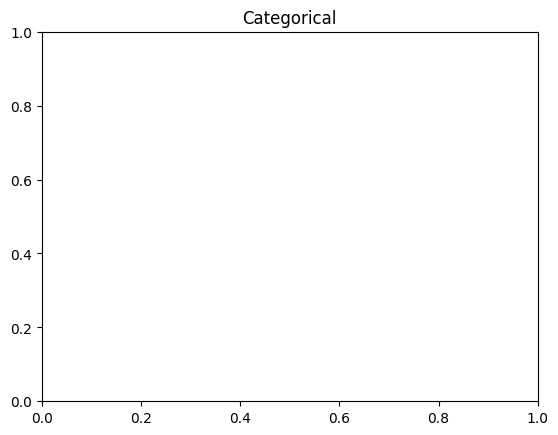

In [58]:
plt.title("Categorical")

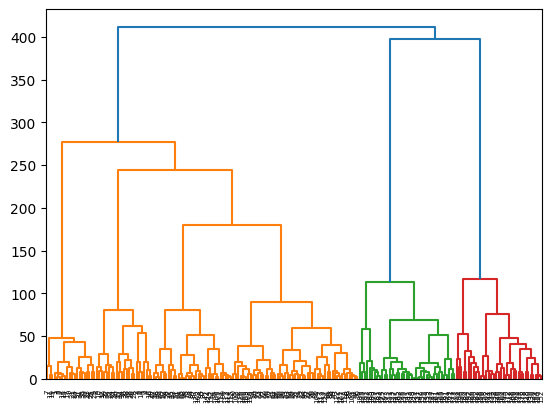

In [59]:
dend = shc.dendrogram(shc.linkage(data, method='ward'))

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

In [60]:
#code
sse = []
silhouette_scores = []

In [61]:
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state=0)
  kmeans.fit(data)
  sse.append(kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

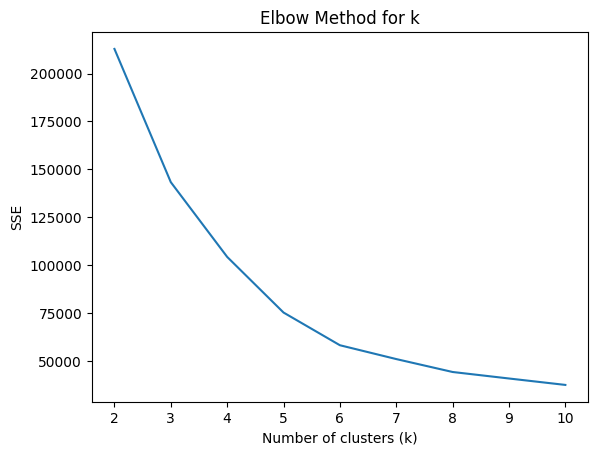

In [77]:
plt.plot(range(2, 11), sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for k')
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [78]:
#code
Z = linkage(X, method='ward')

In [84]:
plt.figure(figsize=(10, 55))

<Figure size 1000x5500 with 0 Axes>

<Figure size 1000x5500 with 0 Axes>

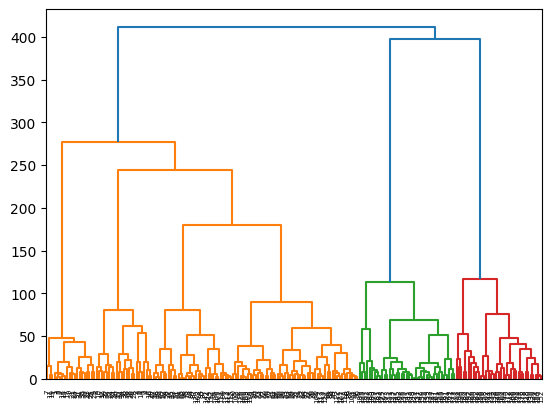

In [85]:
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [80]:
k = 3

In [86]:
cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
cluster.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 1, ..., 1, 2, 2])

#Finally,
Save a copy in your Github. Remember renaming the notebook.